In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
detector = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')

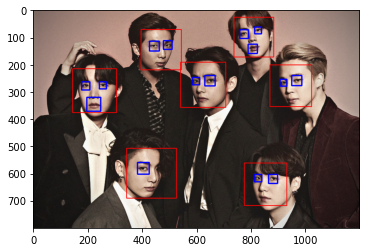

In [5]:
img = cv2.imread('Kpop.png')

while True:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = detector.detectMultiScale(gray, 1.1, 3)
    
    for x,y,w,h in faces:
        rectangles = cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,255), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_detector.detectMultiScale(roi_gray, 1.1, 3)
        for ex,ey,ew,eh in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255,0, 0), 3)   
        cv2.imshow('faces detected', img)
        
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.show()
        
    
    if cv2.waitKey(0) == 27:
        cv2.destroyAllWindows()
        break
    

## Detection of faces in a webcam

In [4]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = detector.detectMultiScale(gray2, 1.1, 3)
    
    for x,y,w,h in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255), 2)
        roi_gray2 = gray2[y:y+h, x:x+w]
        roi_color2 = frame[y:y+h, x:x+w]
        eyes2 = eye_detector.detectMultiScale(roi_gray2)
        for ex,ey,ew,eh in eyes2:
            cv2.rectangle(roi_color2, (ex, ey), (ex+ew, ey+eh), (0,255,0), 1)
        cv2.imshow('faces detected', frame)
        
    if cv2.waitKey(1) == 27:
        cap.release()
        cv2.destroyAllWindows()
        break
    